### Import data

In [1]:
from pandas_datareader import data as pdr
import yfinance as yf
import pandas as pd
import numpy as np
import pickle
import os.path
import matplotlib.pyplot as plt
import cvxpy as cp
from scipy.optimize import minimize
from DATA import get_filtered_stock_data as gfs
from DATA import read_data
from DATA import delete_pickle_file
from Effient_Frontier import get_cov_mean_matrices
from Effient_Frontier import efficient_frontier 
from Rank_stocks import rank_stocks
from Effient_Frontier import ESG_efficient_frontier
from Effient_Frontier import ESG_efficient_frontier_gw
from backtest import backtest

In [2]:
#delete_pickle_file('ESG_US.csv.pickle')

In [2]:
#stock_data = None
file_path = "ESG_US.csv"
esg = read_data(file_path)
column_name = 'environment_score'
column_value = 'High'
threshold = 0
num = 10
lower_bound = 0.00
operator = 'geq'
prefixes= ['US']
start_date = '2000-01-01'
end_date = '2020-01-01'

In [3]:
returns = gfs(file_path, column_name, column_value, prefixes, start_date, end_date, time='y', threshold=threshold, operator=operator)

In [4]:
mu = get_cov_mean_matrices(returns)[1]
cov = get_cov_mean_matrices(returns)[2]
esg = read_data(file_path)
target = np.linspace(np.min(mu), np.max(mu), 100)
rf = 0.00
bounds = [(0, 1) for _ in range(len(mu))]
score = 'environment_score'
window = 5

In [6]:
#eff = efficient_frontier(mu, cov, target, rf, bounds, esg, returns, score)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -3.612221139906543
            Iterations: 14
            Function evaluations: 165
            Gradient evaluations: 14


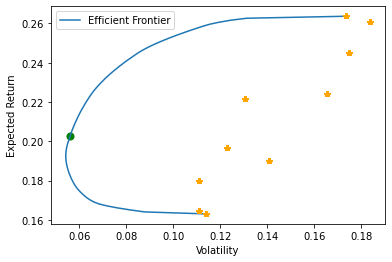

In [5]:
#Get the mean return of the stocks and the covariance matrix
mean = get_cov_mean_matrices(rank_stocks(returns,num,rf))[1]
cov = get_cov_mean_matrices(rank_stocks(returns,num,rf))[2]
        
#Set the target, used for the efficient frontier module 
target = np.linspace(np.min(mean), np.max(mean), 100)
        
#Create the bounds
bounds = [(0, 1) for _ in range(len(mean))]
        
#Alot of computation here is unessecary for the backtest. 
max_sharpe_ret, max_sharpe_vol, max_sharpe_sr, portfolio_esg, frontier, mu, stdevs , w_opt  = efficient_frontier(mean, cov, target, rf, bounds, esg, rank_stocks(returns,num,rf), score,lower_bound)


plt.plot(frontier[:,1], frontier[:,0], label='Efficient Frontier')
plt.plot(stdevs, mu, '*', color='orange')
plt.xlabel('Volatility')
plt.ylabel('Expected Return')
plt.legend()

# Plot a red dot at the portfolio with the highest Sharpe ratio
plt.scatter(max_sharpe_vol, max_sharpe_ret, marker='o', color='g', s=50, label='Max Sharpe Ratio')
plt.show()

In [6]:
w_opt

array([0.24719509, 0.20243107, 0.09868426, 0.15986424, 0.06089477,
       0.11148738, 0.        , 0.01158909, 0.00642982, 0.10142428])

In [8]:
ESG_fron = ESG_efficient_frontier(file_path, column_name, column_value, prefixes, start_date, end_date, time='y', lower_bound=lower_bound, operator=operator, esg=esg, rf=rf, score=score, num=num)

0
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3.612221139906543
            Iterations: 14
            Function evaluations: 165
            Gradient evaluations: 14
3.6084092065248523
25
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3.612221139906543
            Iterations: 14
            Function evaluations: 165
            Gradient evaluations: 14
3.6084092065248523
50
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3.612221139906543
            Iterations: 14
            Function evaluations: 165
            Gradient evaluations: 14
3.6084092065248523
75
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3.612221139906543
            Iterations: 14
            Function evaluations: 165
            Gradient evaluations: 14
3.6084092065248523
100
Optimization terminated successfully    (Exit mode 0)
           

Text(0, 0.5, 'Sharpe Ratio')

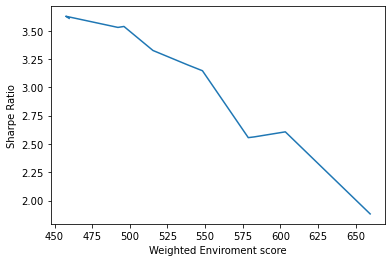

In [10]:
plt.plot(ESG_fron[1], ESG_fron[0])
plt.xlabel('Weighted Enviroment score')
plt.ylabel('Sharpe Ratio')

In [11]:
ESG_GW = ESG_efficient_frontier_gw(num,rf,returns,esg,score)

0
Optimal weights: [0.2472 0.2024 0.0987 0.1599 0.0609 0.1115 0.     0.0116 0.0064 0.1014]
Optimized Sharpe ratio: 3.612221139925515
Sharp ratio 3.612221139925515
Reazlied return 0.2015703724815531
Realized std 0.05580233453971468
ESG score 459.6874243785099
25
Optimal weights: [0.2472 0.2024 0.0987 0.1599 0.0609 0.1115 0.     0.0116 0.0064 0.1014]
Optimized Sharpe ratio: 3.612221139925515
Sharp ratio 3.612221139925515
Reazlied return 0.2015703724815531
Realized std 0.05580233453971468
ESG score 459.6874243785099
50
Optimal weights: [0.2472 0.2024 0.0987 0.1599 0.0609 0.1115 0.     0.0116 0.0064 0.1014]
Optimized Sharpe ratio: 3.612221139925515
Sharp ratio 3.612221139925515
Reazlied return 0.2015703724815531
Realized std 0.05580233453971468
ESG score 459.6874243785099
75
Optimal weights: [0.2472 0.2024 0.0987 0.1599 0.0609 0.1115 0.     0.0116 0.0064 0.1014]
Optimized Sharpe ratio: 3.612221139925515
Sharp ratio 3.612221139925515
Reazlied return 0.2015703724815531
Realized std 0.0558023

Text(0, 0.5, 'Sharpe Ratio')

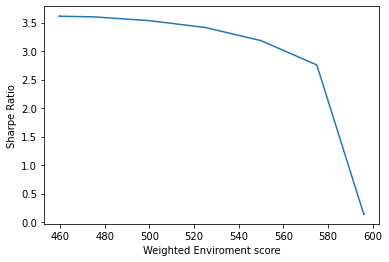

In [12]:
plt.plot(ESG_GW[1], ESG_GW[0])
plt.xlabel('Weighted Enviroment score')
plt.ylabel('Sharpe Ratio')

In [5]:
BacktestDF = backtest(rf,esg,returns,score, window ,num,lower_bound)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -16.52162016887177
            Iterations: 15
            Function evaluations: 180
            Gradient evaluations: 15
For window:  0
Expected return:  0.3117107987783258
Realized return:  0.08703203925049996
Expected volatility:  0.018911216262003903
Realized volatility:  0.10887041355455654
Portfolio value:  108.70320392504999




C:\Users\Bruger\anaconda3\lib\site-packages\sklearn\covariance\_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
C:\Users\Bruger\anaconda3\lib\site-packages\pandas\core\frame.py:9673: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
C:\Users\Bruger\anaconda3\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\Bruger\anaconda3\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Optimization terminated successfully    (Exit mode 0)
            Current function value: -12.506622756786559
            Iterations: 18
            Function evaluations: 213
            Gradient evaluations: 18
For window:  1
Expected return:  0.2509859204452955
Realized return:  0.12920095016079453
Expected volatility:  0.020264199399309325
Realized volatility:  0.05559744717416339
Portfolio value:  122.74776115768906




C:\Users\Bruger\anaconda3\lib\site-packages\sklearn\covariance\_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
C:\Users\Bruger\anaconda3\lib\site-packages\pandas\core\frame.py:9673: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
C:\Users\Bruger\anaconda3\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\Bruger\anaconda3\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Optimization terminated successfully    (Exit mode 0)
            Current function value: -11.401742413351535
            Iterations: 13
            Function evaluations: 153
            Gradient evaluations: 13
For window:  2
Expected return:  0.1921537718576617
Realized return:  0.09546391030792561
Expected volatility:  0.017081830114200915
Realized volatility:  0.04047955170731533
Portfolio value:  134.46574241934536




C:\Users\Bruger\anaconda3\lib\site-packages\sklearn\covariance\_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
C:\Users\Bruger\anaconda3\lib\site-packages\pandas\core\frame.py:9673: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
C:\Users\Bruger\anaconda3\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\Bruger\anaconda3\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Optimization terminated successfully    (Exit mode 0)
            Current function value: -23.097357376616493
            Iterations: 19
            Function evaluations: 228
            Gradient evaluations: 19
For window:  3
Expected return:  0.23036153961491515
Realized return:  -0.14034851142939417
Expected volatility:  0.011337301786243353
Realized volatility:  0.16499017504835622
Portfolio value:  115.59367563254189




C:\Users\Bruger\anaconda3\lib\site-packages\sklearn\covariance\_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
C:\Users\Bruger\anaconda3\lib\site-packages\pandas\core\frame.py:9673: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
C:\Users\Bruger\anaconda3\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\Bruger\anaconda3\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Optimization terminated successfully    (Exit mode 0)
            Current function value: -9.359234368617066
            Iterations: 16
            Function evaluations: 193
            Gradient evaluations: 16
For window:  4
Expected return:  0.26363967020962725
Realized return:  0.12171385293629867
Expected volatility:  0.028323474557788785
Realized volatility:  0.05871950711886417
Portfolio value:  129.66302726884732




C:\Users\Bruger\anaconda3\lib\site-packages\sklearn\covariance\_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
C:\Users\Bruger\anaconda3\lib\site-packages\pandas\core\frame.py:9673: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
C:\Users\Bruger\anaconda3\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\Bruger\anaconda3\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Optimization terminated successfully    (Exit mode 0)
            Current function value: -10.003882660740532
            Iterations: 18
            Function evaluations: 213
            Gradient evaluations: 18
For window:  5
Expected return:  0.21980251321048883
Realized return:  0.3611759303491637
Expected volatility:  0.022079261130946895
Realized volatility:  0.07089756662447293
Portfolio value:  176.49419177456224




C:\Users\Bruger\anaconda3\lib\site-packages\sklearn\covariance\_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
C:\Users\Bruger\anaconda3\lib\site-packages\pandas\core\frame.py:9673: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
C:\Users\Bruger\anaconda3\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\Bruger\anaconda3\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Optimization terminated successfully    (Exit mode 0)
            Current function value: -9.42125333614979
            Iterations: 16
            Function evaluations: 190
            Gradient evaluations: 16
For window:  6
Expected return:  0.2431239332928306
Realized return:  0.21964599615440472
Expected volatility:  0.025810272142399802
Realized volatility:  0.030065608095430164
Portfolio value:  215.26043434235248




C:\Users\Bruger\anaconda3\lib\site-packages\sklearn\covariance\_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
C:\Users\Bruger\anaconda3\lib\site-packages\pandas\core\frame.py:9673: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
C:\Users\Bruger\anaconda3\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\Bruger\anaconda3\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Optimization terminated successfully    (Exit mode 0)
            Current function value: -8.979441581705352
            Iterations: 13
            Function evaluations: 155
            Gradient evaluations: 13
For window:  7
Expected return:  0.24302862706589023
Realized return:  0.2415508323439709
Expected volatility:  0.027082037605354516
Realized volatility:  0.02362371829192131
Portfolio value:  267.2567714284724




C:\Users\Bruger\anaconda3\lib\site-packages\sklearn\covariance\_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
C:\Users\Bruger\anaconda3\lib\site-packages\pandas\core\frame.py:9673: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
C:\Users\Bruger\anaconda3\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\Bruger\anaconda3\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Optimization terminated successfully    (Exit mode 0)
            Current function value: -11.356726913975425
            Iterations: 16
            Function evaluations: 188
            Gradient evaluations: 16
For window:  8
Expected return:  0.2462330766415861
Realized return:  0.2479330063557423
Expected volatility:  0.021892424126750513
Realized volatility:  0.023051452304603367
Portfolio value:  333.51854623766303




C:\Users\Bruger\anaconda3\lib\site-packages\sklearn\covariance\_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
C:\Users\Bruger\anaconda3\lib\site-packages\pandas\core\frame.py:9673: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
C:\Users\Bruger\anaconda3\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\Bruger\anaconda3\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Optimization terminated successfully    (Exit mode 0)
            Current function value: -21.350322940584025
            Iterations: 18
            Function evaluations: 222
            Gradient evaluations: 18
For window:  9
Expected return:  0.2573577036969141
Realized return:  0.21525296751449408
Expected volatility:  0.012725120644932019
Realized volatility:  0.02858581500464817
Portfolio value:  405.30940303644




C:\Users\Bruger\anaconda3\lib\site-packages\sklearn\covariance\_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
C:\Users\Bruger\anaconda3\lib\site-packages\pandas\core\frame.py:9673: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
C:\Users\Bruger\anaconda3\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\Bruger\anaconda3\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Optimization terminated successfully    (Exit mode 0)
            Current function value: -27.033681028791754
            Iterations: 18
            Function evaluations: 223
            Gradient evaluations: 18
For window:  10
Expected return:  0.26393114734811446
Realized return:  0.005699742886944623
Expected volatility:  0.009977394400865933
Realized volatility:  0.1204191516288929
Portfolio value:  407.6195624234087




C:\Users\Bruger\anaconda3\lib\site-packages\sklearn\covariance\_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
C:\Users\Bruger\anaconda3\lib\site-packages\pandas\core\frame.py:9673: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
C:\Users\Bruger\anaconda3\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\Bruger\anaconda3\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Optimization terminated successfully    (Exit mode 0)
            Current function value: -18.011724153412175
            Iterations: 17
            Function evaluations: 203
            Gradient evaluations: 17
For window:  11
Expected return:  0.21201101770247885
Realized return:  0.12437921415547498
Expected volatility:  0.01221239410473349
Realized volatility:  0.04318944291795682
Portfolio value:  458.3189632720308




C:\Users\Bruger\anaconda3\lib\site-packages\sklearn\covariance\_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
C:\Users\Bruger\anaconda3\lib\site-packages\pandas\core\frame.py:9673: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
C:\Users\Bruger\anaconda3\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\Bruger\anaconda3\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Optimization terminated successfully    (Exit mode 0)
            Current function value: -13.927270873318118
            Iterations: 15
            Function evaluations: 181
            Gradient evaluations: 15
For window:  12
Expected return:  0.19509217524751168
Realized return:  0.1842833536573436
Expected volatility:  0.01439460994303525
Realized volatility:  0.015608867992753264
Portfolio value:  542.7795188685576




C:\Users\Bruger\anaconda3\lib\site-packages\sklearn\covariance\_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
C:\Users\Bruger\anaconda3\lib\site-packages\pandas\core\frame.py:9673: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
C:\Users\Bruger\anaconda3\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\Bruger\anaconda3\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Optimization terminated successfully    (Exit mode 0)
            Current function value: -13.567345979308824
            Iterations: 16
            Function evaluations: 189
            Gradient evaluations: 16
For window:  13
Expected return:  0.19490240719751362
Realized return:  0.16911216360205614
Expected volatility:  0.01493532881528737
Realized volatility:  0.022332254101668992
Portfolio value:  634.5701376633024




C:\Users\Bruger\anaconda3\lib\site-packages\sklearn\covariance\_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
C:\Users\Bruger\anaconda3\lib\site-packages\pandas\core\frame.py:9673: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
C:\Users\Bruger\anaconda3\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\Bruger\anaconda3\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [6]:
display(BacktestDF)

,Expected returns,Realized returns,Expected stds,Realized stds,Expected srs,Realized srs,Portfolio Value,Portfolio E Score
0,0.311711,0.087032,0.018911,0.108870,16.482853,0.799409,108.703204,450.426158
1,0.250986,0.129201,0.020264,0.055597,12.385682,2.323865,122.747761,554.556751
2,0.192154,0.095464,0.017082,0.040480,11.249016,2.358324,134.465742,555.775928
3,0.230362,-0.140349,0.011337,0.164990,20.318903,-0.850648,115.593676,505.520524
4,0.263640,0.121714,0.028323,0.058720,9.308168,2.072801,129.663027,586.973317
5,0.219803,0.361176,0.022079,0.070898,9.955157,5.094335,176.494192,512.767663
6,0.243124,0.219646,0.025810,0.030066,9.419658,7.305556,215.260434,605.111896
7,0.243029,0.241551,0.027082,0.023624,8.973794,10.224929,267.256771,607.169191
8,0.246233,0.247933,0.021892,0.023051,11.247410,10.755635,333.518546,523.335203
9,0.257358,0.215253,0.012725,0.028586,20.224382,7.530062,405.309403,508.197153


In [7]:
display(BacktestDF.mean())

Expected returns       0.237452
Realized returns       0.147293
Expected stds          0.018359
Realized stds          0.057602
Expected srs          14.284368
Realized srs           4.994309
Portfolio Value      289.450067
Portfolio E Score    517.743991
dtype: float64

In [ ]:
"""
max_sharpe_ret = eff[0]
max_sharpe_vol = eff[1]
max_sharpe_sr = eff[2]
portfolio_esg = eff[3]
print(portfolio_esg)
fron=eff[4]
mu = eff[5]
stdevs_ = eff[6]
"""

In [ ]:
"""
plt.scatter(portfolio_esg, max_sharpe_sr)
plt.xlabel('Weighted Enviroment score')
plt.ylabel('Sharpe Ratio')
"""

#### Martin kode

In [ ]:
def check_for_zeros(df):
    # Check if any element in the DataFrame is equal to 0
    if (df == 0).any().any():
        print("There are 0's in the DataFrame.")
    else:
        print("There are no 0's in the DataFrame.")

def has_infinite(df):
    """
    Returns True if the DataFrame contains any infinite value, otherwise False.
    """
    return not np.isfinite(df).all().all()

In [ ]:
check_for_zeros(returns.cov())
has_infinite(returns.cov())

In [ ]:
mean_matrix = np.array(returns.mean())
cov_matrix = np.array(returns.cov())
#print(cov_matrix )


# Permanently changes the pandas settings
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', -1)
 
# All dataframes hereafter reflect these changes.
#display(returns.cov())
#display(returns.mean())
 
# Resets the options
#pd.reset_option('all')


In [ ]:
#S = np.array([[185, 86.5, 80, 20],[86.5, 196, 76, 13.5],[80, 76, 411, -19],[20, 13.5, -19, 25]])*100
S = cov_matrix
#zbar = np.array([14, 12, 15, 7])
zbar = mean_matrix
unity = np.ones(len(zbar))

# Calculate standard deviations of securities
stdevs = np.sqrt(np.diag(S))

# Calculate parameters A, B, C, and D for efficient frontier
A = np.dot(unity.T, np.dot(np.linalg.inv(S), unity))
print(A)
B = np.dot(unity.T, np.dot(np.linalg.inv(S), zbar))
print(B)
C = np.dot(zbar.T, np.dot(np.linalg.inv(S), zbar))
print(C)
D = A*C - B**2
print(D)

# Define mu values for efficient frontier
mu = np.linspace(np.min(zbar), np.max(zbar), 100)

# Calculate minimum variance and standard deviation for each mu
minvar = ((A * mu ** 2) - 2 * B * mu + C) / D
# minvar[minvar < 0] = 0    # Ensure minvar is non-negative
minstd = np.sqrt(minvar)

# Repeat stdevs and zbar 300 times to match length of mu and minstd
stdevs_ = np.repeat(stdevs[:, np.newaxis], 100, axis=1)
zbar_ = np.repeat(zbar[:, np.newaxis], 100, axis=1)

# Plot efficient frontier and individual securities
plt.plot(minstd, mu, label='Efficient Frontier')
plt.plot(stdevs_, zbar_, '*', label='Individual Securities')
#plt.legend()
plt.title('Efficient Frontier with Individual Securities', fontsize=18)
plt.ylabel('Expected Return (%)', fontsize=18)
plt.xlabel('Standard Deviation (%)', fontsize=18)
plt.show()

In [ ]:
from sklearn.covariance import ShrunkCovariance

# Generate some random data for illustration

# Estimate the shrinkage covariance matrix using the Ledoit-Wolf method
shrinkage_cov = ShrunkCovariance(shrinkage=0.1).fit(test).covariance_

print("Shrinkage Covariance Matrix:")
print(shrinkage_cov)

In [17]:
def backtest(rf, esg, returns, score, window, num):
    #Find the how many periods the data has
    n = returns.shape[0]
    
    #Create a list with the initial value 100. This is used to see how much an investment of 100 would have developed over the periods
    portfolio_value = [100]
    
    #Create a bunch of lists where values will be stored
    expected_srs = []
    expected_stds = []
    expected_returns = []
    
    realized_srs = []
    realized_stds = []
    realized_returns = []
    
    portfolio_esgs = []
    
    #Loop over the periods
    for i in range(n-window-1):
        #The current window
        rwindow = returns[i:i+window]
        
        #Create a dataframe of Sharpe ratios, then using the top 'num' stocks to select for investing
        SRs = (rwindow.mean()-rf)/rwindow.std()
        df = pd.DataFrame(SRs)
        df = df.rename(columns={0: 'Sharperatio'})
        df_sorted_desc = df.sort_values(by='Sharperatio', ascending=False)
        names = df_sorted_desc.head(num).index.tolist()
        num_window = rwindow[names]

        #Get the mean return of the stocks and the covariance matrix
        mu = get_cov_mean_matrices(num_window)[1]
        cov = get_cov_mean_matrices(num_window)[2]
        
        #Set the target, used for the efficient frontier module 
        target = np.linspace(np.min(mu), np.max(mu), 100)
        
        #Create the bounds
        bounds = [(0, 1) for _ in range(len(mu))]
        
        #Alot of computation here is unessecary for the backtest. 
        max_sharpe_ret, max_sharpe_vol, max_sharpe_sr, portfolio_esg, frontier, mu, stdevs , w_opt  = efficient_frontier(mu, cov, target, rf, bounds, esg, num_window, score,lower_bound)
        
        #Get the mean returns for the next period
        next_mu_window = returns[i+window:i+window+1]
        next_mu_names = next_mu_window[names]
        next_mu = get_cov_mean_matrices(next_mu_names)[1]
        
        #Get the covariance matrix from the current period i to the next i+1
        next_cov_window = returns[i+window-1:i+window+1]
        next_cov_names = next_cov_window[names]
        cov = get_cov_mean_matrices(next_cov_names)[2]
        
        #check_for_zeros(rwindow)
        #check_for_zeros(cov)
        
        #Compute the return if 100% was invested in the weights w_opt and held for the next period i+1
        realized_return = np.sum(next_mu *w_opt)
        realized_std = np.sqrt(np.dot(w_opt.T, np.dot(cov, w_opt)))
        SR = (realized_return-rf)/realized_std
        
        portfolio_value.append(portfolio_value[i]*(1+realized_return))
        
        #A bunch of prints to see the results while code is running
        print("For window: ", i)
        print("Expected return: ", max_sharpe_ret)
        print("Realized return: ", realized_return)
        print("Expected volatility: ", max_sharpe_vol)
        print("Realized volatility: ", realized_std)
        print("Portfolio value: ",portfolio_value[i]*(1+realized_return))
        print("\n")
        
        #Append results to the lists
        expected_srs.append(max_sharpe_sr)
        expected_stds.append(max_sharpe_vol)
        expected_returns.append(max_sharpe_ret)
        
        realized_srs.append(SR)
        realized_stds.append(realized_std)
        realized_returns.append(realized_return)
        
        portfolio_esgs.append(portfolio_esg)

    #Reshape the lists such that they are column vectors
    col1 = np.reshape(expected_returns, (-1, 1))
    col2 = np.reshape(realized_returns, (-1, 1))
    col3 = np.reshape(expected_stds, (-1, 1))
    col4 = np.reshape(realized_stds, (-1, 1))
    col5 = np.reshape(expected_srs, (-1, 1))
    col6 = np.reshape(realized_srs, (-1, 1))
    col7 = np.reshape(portfolio_value[1:], (-1, 1))
    col8 = np.reshape(portfolio_esgs,(-1,1))


    # Combine the column vectors into a single NumPy array
    data = np.hstack((col1, col2, col3, col4, col5, col6, col7,col8))

    # Create a Pandas DataFrame from the NumPy array
    df = pd.DataFrame(data, columns=['Expected returns', 'Realized returns', 'Expected stds', 'Realized stds', 'Expected srs', 'Realized srs', 'Portfolio Value','Portfolio E Score'])
    
    return df

In [14]:
rf = 0.0
num = 20

In [15]:
returns.shape

(20, 334)

In [18]:
BacktestDF = backtest(rf,esg,returns,score, 5 ,num)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -23.259164474285054
            Iterations: 27
            Function evaluations: 597
            Gradient evaluations: 27
For window:  0
Expected return:  0.39655493248261253
Realized return:  0.24674934913039193
Expected volatility:  0.017187225404550463
Realized volatility:  0.0695031956400795
Portfolio value:  124.67493491303921




C:\Users\Bruger\anaconda3\lib\site-packages\sklearn\covariance\_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
C:\Users\Bruger\anaconda3\lib\site-packages\pandas\core\frame.py:9673: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
C:\Users\Bruger\anaconda3\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\Bruger\anaconda3\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Optimization terminated successfully    (Exit mode 0)
            Current function value: -26.726214926655093
            Iterations: 37
            Function evaluations: 830
            Gradient evaluations: 37
For window:  1
Expected return:  0.4123452575044163
Realized return:  0.17577364217766156
Expected volatility:  0.015495724474562702
Realized volatility:  0.1058182740938144
Portfolio value:  146.58950231096702




C:\Users\Bruger\anaconda3\lib\site-packages\sklearn\covariance\_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
C:\Users\Bruger\anaconda3\lib\site-packages\pandas\core\frame.py:9673: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
C:\Users\Bruger\anaconda3\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\Bruger\anaconda3\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Optimization terminated successfully    (Exit mode 0)
            Current function value: -12.753205888041812
            Iterations: 24
            Function evaluations: 528
            Gradient evaluations: 24
For window:  2
Expected return:  0.2027794142180523
Realized return:  0.1982528082054532
Expected volatility:  0.016084872830560672
Realized volatility:  0.02029575510947752
Portfolio value:  175.65128279755604




C:\Users\Bruger\anaconda3\lib\site-packages\sklearn\covariance\_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
C:\Users\Bruger\anaconda3\lib\site-packages\pandas\core\frame.py:9673: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
C:\Users\Bruger\anaconda3\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\Bruger\anaconda3\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Optimization terminated successfully    (Exit mode 0)
            Current function value: -39.47739385247676
            Iterations: 34
            Function evaluations: 768
            Gradient evaluations: 34
For window:  3
Expected return:  0.25814388687804446
Realized return:  -0.12060522595605297
Expected volatility:  0.0068580841857353875
Realized volatility:  0.1691703411900035
Portfolio value:  154.46682014628624




C:\Users\Bruger\anaconda3\lib\site-packages\sklearn\covariance\_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
C:\Users\Bruger\anaconda3\lib\site-packages\pandas\core\frame.py:9673: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
C:\Users\Bruger\anaconda3\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\Bruger\anaconda3\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Optimization terminated successfully    (Exit mode 0)
            Current function value: -9.444448523048644
            Iterations: 28
            Function evaluations: 616
            Gradient evaluations: 28
For window:  4
Expected return:  0.2265748511955688
Realized return:  0.1356485113662684
Expected volatility:  0.02405299934782633
Realized volatility:  0.03662722359212721
Portfolio value:  175.42001435461108




C:\Users\Bruger\anaconda3\lib\site-packages\sklearn\covariance\_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
C:\Users\Bruger\anaconda3\lib\site-packages\pandas\core\frame.py:9673: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
C:\Users\Bruger\anaconda3\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\Bruger\anaconda3\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Optimization terminated successfully    (Exit mode 0)
            Current function value: -10.951185539379932
            Iterations: 31
            Function evaluations: 689
            Gradient evaluations: 31
For window:  5
Expected return:  0.20198898481192548
Realized return:  0.3210681399569872
Expected volatility:  0.018485914586838226
Realized volatility:  0.0546019386521204
Portfolio value:  231.74179207467407




C:\Users\Bruger\anaconda3\lib\site-packages\sklearn\covariance\_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
C:\Users\Bruger\anaconda3\lib\site-packages\pandas\core\frame.py:9673: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
C:\Users\Bruger\anaconda3\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\Bruger\anaconda3\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Optimization terminated successfully    (Exit mode 0)
            Current function value: -8.704538255463792
            Iterations: 20
            Function evaluations: 437
            Gradient evaluations: 20
For window:  6
Expected return:  0.22697080251466095
Realized return:  0.1969514122625974
Expected volatility:  0.026121839002872727
Realized volatility:  0.03345916500666306
Portfolio value:  277.38366530404636




C:\Users\Bruger\anaconda3\lib\site-packages\sklearn\covariance\_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
C:\Users\Bruger\anaconda3\lib\site-packages\pandas\core\frame.py:9673: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
C:\Users\Bruger\anaconda3\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\Bruger\anaconda3\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Optimization terminated successfully    (Exit mode 0)
            Current function value: -8.334685745268734
            Iterations: 20
            Function evaluations: 435
            Gradient evaluations: 20
For window:  7
Expected return:  0.22949930485828995
Realized return:  0.20574780051622685
Expected volatility:  0.02762892993721064
Realized volatility:  0.025044647971197712
Portfolio value:  334.4547443394831




C:\Users\Bruger\anaconda3\lib\site-packages\sklearn\covariance\_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
C:\Users\Bruger\anaconda3\lib\site-packages\pandas\core\frame.py:9673: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
C:\Users\Bruger\anaconda3\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\Bruger\anaconda3\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Optimization terminated successfully    (Exit mode 0)
            Current function value: -16.282727903775477
            Iterations: 34
            Function evaluations: 752
            Gradient evaluations: 34
For window:  8
Expected return:  0.24436807453622886
Realized return:  0.31117122514168044
Expected volatility:  0.015097774172906881
Realized volatility:  0.03527271947027912
Portfolio value:  438.5274368900476




C:\Users\Bruger\anaconda3\lib\site-packages\sklearn\covariance\_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
C:\Users\Bruger\anaconda3\lib\site-packages\pandas\core\frame.py:9673: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
C:\Users\Bruger\anaconda3\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\Bruger\anaconda3\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Optimization terminated successfully    (Exit mode 0)
            Current function value: -23.858490997702113
            Iterations: 34
            Function evaluations: 755
            Gradient evaluations: 34
For window:  9
Expected return:  0.260994619600609
Realized return:  0.19272835417075349
Expected volatility:  0.011122927942414372
Realized volatility:  0.03533182078989698
Portfolio value:  523.0441080605855




C:\Users\Bruger\anaconda3\lib\site-packages\sklearn\covariance\_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
C:\Users\Bruger\anaconda3\lib\site-packages\pandas\core\frame.py:9673: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
C:\Users\Bruger\anaconda3\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\Bruger\anaconda3\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Optimization terminated successfully    (Exit mode 0)
            Current function value: -26.309688618383415
            Iterations: 35
            Function evaluations: 781
            Gradient evaluations: 35
For window:  10
Expected return:  0.26193111698269245
Realized return:  0.05094918078699037
Expected volatility:  0.010043748156757498
Realized volatility:  0.09355298542639362
Portfolio value:  549.6927768817344




C:\Users\Bruger\anaconda3\lib\site-packages\sklearn\covariance\_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
C:\Users\Bruger\anaconda3\lib\site-packages\pandas\core\frame.py:9673: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
C:\Users\Bruger\anaconda3\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\Bruger\anaconda3\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Optimization terminated successfully    (Exit mode 0)
            Current function value: -25.741661179709542
            Iterations: 35
            Function evaluations: 778
            Gradient evaluations: 35
For window:  11
Expected return:  0.2627950188153652
Realized return:  0.06425557442625054
Expected volatility:  0.010237682282620954
Realized volatility:  0.0896534569652951
Portfolio value:  585.013602018231




C:\Users\Bruger\anaconda3\lib\site-packages\sklearn\covariance\_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
C:\Users\Bruger\anaconda3\lib\site-packages\pandas\core\frame.py:9673: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
C:\Users\Bruger\anaconda3\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\Bruger\anaconda3\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Optimization terminated successfully    (Exit mode 0)
            Current function value: -21.373164181807468
            Iterations: 35
            Function evaluations: 782
            Gradient evaluations: 35
For window:  12
Expected return:  0.21367722139912187
Realized return:  0.1925308626903645
Expected volatility:  0.010295081794057118
Realized volatility:  0.011104666855550392
Portfolio value:  697.6467755003987




C:\Users\Bruger\anaconda3\lib\site-packages\sklearn\covariance\_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
C:\Users\Bruger\anaconda3\lib\site-packages\pandas\core\frame.py:9673: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
C:\Users\Bruger\anaconda3\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\Bruger\anaconda3\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


Optimization terminated successfully    (Exit mode 0)
            Current function value: -13.460229405215756
            Iterations: 22
            Function evaluations: 485
            Gradient evaluations: 22
For window:  13
Expected return:  0.20815374975224032
Realized return:  0.06870172000440958
Expected volatility:  0.015548430090787022
Realized volatility:  0.06840705267957234
Portfolio value:  745.5763089328062




C:\Users\Bruger\anaconda3\lib\site-packages\sklearn\covariance\_empirical_covariance.py:86: UserWarning: Only one sample available. You may want to reshape your data array
  warnings.warn(
C:\Users\Bruger\anaconda3\lib\site-packages\pandas\core\frame.py:9673: RuntimeWarning: Degrees of freedom <= 0 for slice
  base_cov = np.cov(mat.T, ddof=ddof)
C:\Users\Bruger\anaconda3\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\Bruger\anaconda3\lib\site-packages\numpy\lib\function_base.py:2680: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


In [ ]:
display(BacktestDF)

In [ ]:
display(BacktestDF.mean())

# Det er fucked. De top 20 vi vælger bliver valgt ud fra hele perioden og ikke den lille periode?

# Man skal tage vinduet af det store datasæt, lave beregningerne på dem og så fucking endelig lave rangeringeing og vælge aktier

# Efficient frontier test

# Greenwashing

In [ ]:
weights, sharpe, realized_return, realized_std, ESG_score = greenwashing(returns,esg,400,0.0,score)

In [ ]:
#ESG_fron = ESG_efficient_frontier(file_path, column_name, column_value, prefixes, start_date, end_date, time='y', operator=operator, esg=esg, rf=rf, score=score, num=num)